In [102]:
from arcgis.gis import GIS
import pandas as pd
import arcgis
gis = GIS('home')

In [103]:
m = gis.map("Oakland,CA")
m

MapView(layout=Layout(height='400px', width='100%'))

In [104]:
m.zoom

-1.0

In [105]:
m.zoom = 10

In [106]:
m.center

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': -13611375.89013029, 'y': 4551936.947763765}

In [107]:
dublinLoc = arcgis.geocoding.geocode('Dublin, CA', max_locations=1)[0]
dublinLoc

{'address': 'Dublin, California', 'location': {'x': -121.91634999999997, 'y': 37.70423000000005}, 'score': 100, 'attributes': {'Loc_name': 'World', 'Status': 'T', 'Score': 100, 'Match_addr': 'Dublin, California', 'LongLabel': 'Dublin, CA, USA', 'ShortLabel': 'Dublin', 'Addr_type': 'Locality', 'Type': 'City', 'PlaceName': 'Dublin', 'Place_addr': 'Dublin, California', 'Phone': '', 'URL': '', 'Rank': 8.67, 'AddBldg': '', 'AddNum': '', 'AddNumFrom': '', 'AddNumTo': '', 'AddRange': '', 'Side': '', 'StPreDir': '', 'StPreType': '', 'StName': '', 'StType': '', 'StDir': '', 'BldgType': '', 'BldgName': '', 'LevelType': '', 'LevelName': '', 'UnitType': '', 'UnitName': '', 'SubAddr': '', 'StAddr': '', 'Block': '', 'Sector': '', 'Nbrhd': '', 'District': '', 'City': 'Dublin', 'MetroArea': 'San Francisco Bay Area', 'Subregion': 'Alameda County', 'Region': 'California', 'RegionAbbr': 'CA', 'Territory': '', 'Zone': '', 'Postal': '', 'PostalExt': '', 'Country': 'USA', 'LangCode': 'ENG', 'Distance': 0, '

In [108]:
m.center = [dublinLoc["location"]["y"],dublinLoc["location"]["x"]]

In [109]:
m.basemap

'default'

In [110]:
m.basemaps

['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector']

In [111]:
m.basemap = "streets"

In [112]:
fmSearch = gis.content.search(query="title:Farmers Markets in Alameda County",item_type="Feature Layer")
farmersMarkets = fmSearch[0]
fmLayer = farmersMarkets.layers[0]
fmLayer

<FeatureLayer url:"https://services3.arcgis.com/HReqYJDJNUe3sQwB/arcgis/rest/services/Farmers_Markets_in_Alameda_County/FeatureServer/0">

In [131]:
sdf = pd.DataFrame.spatial.from_layer(fmLayer)
sdf.spatial.plot(
    map_widget=m,
    renderer_type="u",
    palette = "Blues",
    col= "Days",
    marker_size=10,
    line_width = 0.5,
)

True

In [133]:
m.remove_layers(m.layers[0])

True

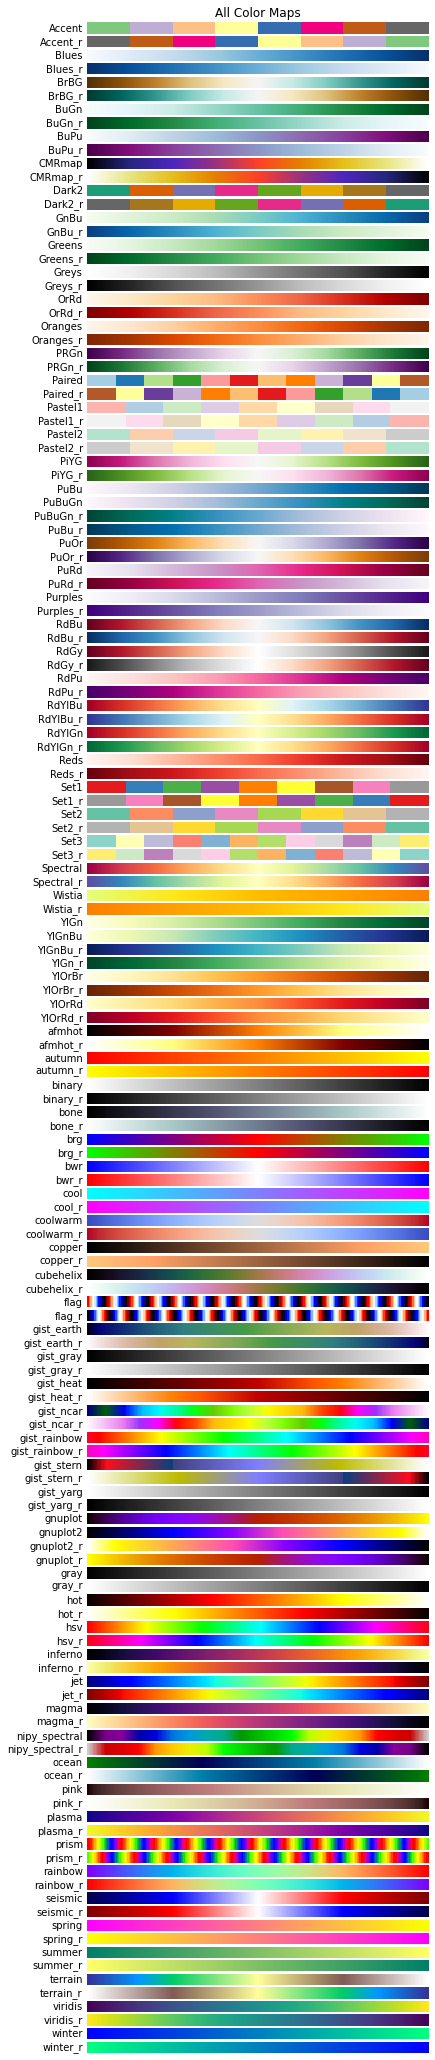

In [101]:
from arcgis.mapping import display_colormaps
display_colormaps()